### 导包

In [1]:
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba

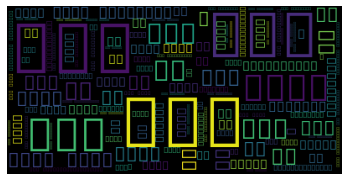

In [2]:
text = open("315meeting.txt",encoding='utf-8').read()
wc = WordCloud().generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('output\AI.jpg')

### 指定中文字体

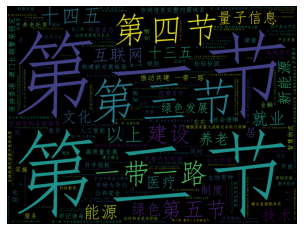

In [3]:
font = r'C:\Windows\Fonts\simfang.ttf'
wc = WordCloud(font_path=font,width=800,height=600).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('output\AII.jpg')

## 分词并统计词频

### 导包

In [4]:
import jieba

读取315会议文本

In [5]:
with open('315meeting.txt','r',encoding='utf-8') as f:
    meeting = f.read()

加载自定义词库

In [6]:
jieba.load_userdict('AIDict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\36942\AppData\Local\Temp\jieba.cache
Loading model cost 0.776 seconds.
Prefix dict has been built successfully.


分词

In [7]:
seg_list = jieba.cut(meeting,cut_all=False)

词频统计

In [8]:
tf = {}
for seg in seg_list:
    if seg in tf:
        tf[seg] += 1
    else:
        tf[seg] = 1

统计出现的词

In [9]:
ci = list(tf.keys())

加载休止词

In [10]:
with open('stopword.txt','r',encoding='utf-8') as ft:
    stopword = ft.read()

筛选词语，词频小于5或者词语长度小于2或者词语为停止词语或者词语中包含“——”则去除掉

In [11]:
for seg in ci:
    if tf[seg]<5 or len(seg)<2 or seg in stopword or "——" in seg:
        tf.pop(seg)
print(tf)

{'北京': 7, '国民经济': 6, '社会': 101, '发展': 460, '第十四': 5, '规划': 83, '2035': 5, '远景': 5, '目标': 25, '纲要': 8, '目录': 9, '建设': 349, '社会主义': 55, '现代化': 53, '国家': 167, '环境': 50, '创新': 139, '驱动': 7, '优势': 36, '强化': 92, '战略': 91, '科技': 74, '力量': 17, '提升': 157, '企业': 78, '技术': 56, '创新能力': 7, '激发': 10, '人才': 34, '活力': 11, '完善': 276, '体制': 31, '机制': 159, '加快': 153, '产业': 101, '体系': 250, '壮大': 13, '实体': 13, '经济': 115, '实施': 151, '制造': 19, '强国': 19, '发展壮大': 5, '战略性': 19, '新兴产业': 12, '服务业': 27, '繁荣': 8, '基础设施': 56, '强大': 11, '国内': 37, '市场': 65, '构建': 90, '格局': 26, '畅通': 14, '循环': 21, '国际': 75, '双循环': 5, '培育': 40, '完整': 5, '内需': 5, '数字化': 25, '数字': 54, '中国': 58, '打造': 35, '步伐': 6, '提高': 124, '政府': 48, '水平': 71, '营造': 10, '生态': 80, '深化改革': 5, '高水平': 31, '各类': 23, '市场主体': 8, '高标准': 11, '建立': 63, '财税': 6, '治理': 101, '能力': 107, '农业': 65, '农村': 47, '优先发展': 6, '推进': 247, '乡村': 38, '振兴': 14, '质量': 46, '效益': 8, '竞争力': 24, '健全': 176, '城乡': 39, '融合': 44, '拓展': 25, '脱贫': 14, '攻坚': 9, '成果': 21, '衔接': 20, '新型': 38, '城镇

## 绘制词云图

### 按照词频绘制词云图

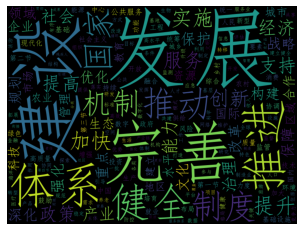

In [12]:
wc = WordCloud(font_path=font,width=800,height=600).generate_from_frequencies(tf)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('output\AIII.jpg')

## 套图形

### 导包

In [13]:
from PIL import Image
import numpy as np

### 套入图形绘图

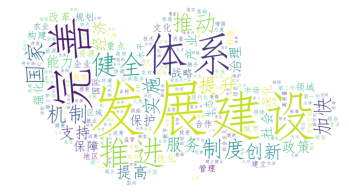

In [14]:
mask = np.array(Image.open("pictures\heart.png"))
wc = WordCloud(background_color="white",mask=mask,font_path=font,width=800,height=600).generate_from_frequencies(tf)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('output\heartmask.jpg')

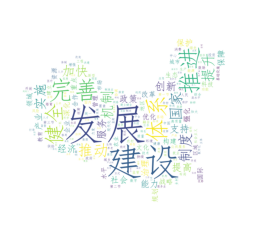

In [15]:
mask = np.array(Image.open("pictures\china.jpg"))
wc = WordCloud(background_color="white",mask=mask,font_path=font,width=800,height=600).generate_from_frequencies(tf)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('output\chinamask.jpg')

## 从原图提取色彩

### 导包

In [16]:
from wordcloud import ImageColorGenerator

### 提取色彩绘图

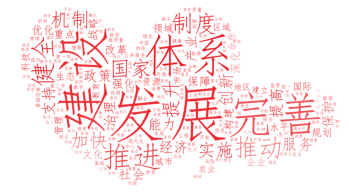

In [17]:
mask = np.array(Image.open("pictures\heart.png"))
wc = WordCloud(background_color="white",mask=mask,font_path=font,width=800,height=600).generate_from_frequencies(tf)
image_colors = ImageColorGenerator(mask)
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis('off')
plt.show()
wc.to_file('output\heartmaskcolor.jpg')

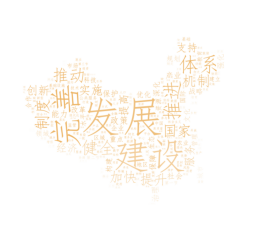

In [18]:
mask = np.array(Image.open("pictures\china.jpg"))
wc = WordCloud(background_color="white",mask=mask,font_path=font,width=800,height=600).generate_from_frequencies(tf)
image_colors = ImageColorGenerator(mask)
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis('off')
plt.show()
wc.to_file('output\chinamaskcolor.jpg')

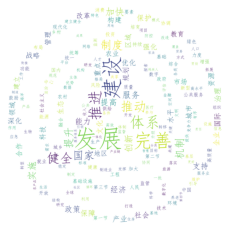

In [22]:
mask = np.array(Image.open("pictures\cuc.jpg"))
wc = WordCloud(background_color="white",mask=mask,font_path=font,width=800,height=600).generate_from_frequencies(tf)
# image_colors = ImageColorGenerator(mask)
# plt.imshow(wc.recolor(color_func=image_colors))
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('output\cucmask.jpg')